In [8]:
import qeds
import matplotlib
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from pandas_datareader import DataReader


#Datasets obtained from: https://www.kaggle.com/datasets/airbnb/bostonS

df_listings = pd.read_csv(r"C:\Users\eliea\Desktop\UofTYear3\Term_2\Eco225\ECO225Project\Data\listings.csv").set_index('id')
df_calendar = pd.read_csv(r"C:\Users\eliea\Desktop\UofTYear3\Term_2\Eco225\ECO225Project\Data\calendar.csv")
df_calendar.rename(columns={"listing_id":"id"}, inplace=True)
df_calendar.set_index("id")

#Create "year_month" column from the "date" column in "df_calendar" dataset
df_calendar["date"] = pd.to_datetime(df_calendar["date"])
df_calendar["year_month"] = df_calendar["date"].dt.to_period('M')

#For later

#df_cal_lis = pd.merge(df_listings, df_caleandar, on='id', how='outer')

#Create "Year", "Month", and "Day" columns from the "date" column
#Documentation Source: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
#df_cal_lis["date"] = pd.to_datetime(df_cal_lis["date"])
#df_cal_lis["Year"] = df_cal_lis["date"].dt.year
#df_cal_lis["Month"] = df_cal_lis["date"].dt.month
#df_cal_lis["Day"] = df_cal_lis["date"].dt.day

#df_cal_lis

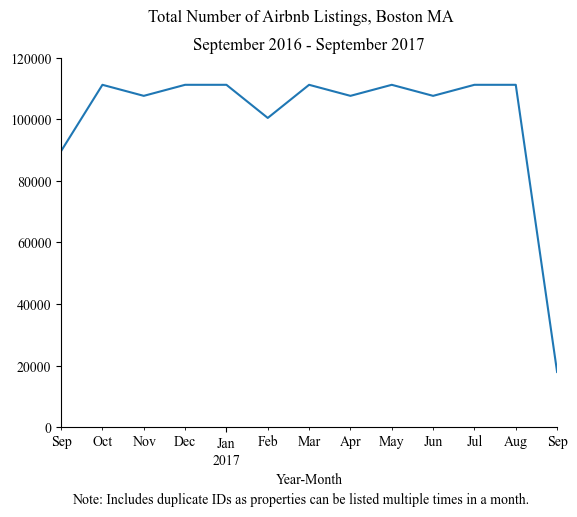

In [9]:
#Create preliminary visualizations

#1) Create a line plot of the total number of listings per year-month

#Count the total number of listings per month
total_listings = df_calendar.groupby("year_month")["id"].count().reset_index()
total_listings.rename(columns={"id":"total_listings"}, inplace=True)

#Change font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

#Create the line plot
#Create figure and plot space
fig, ax = plt.subplots()
#Plot the count of total listings by year-month
total_listings.plot(x="year_month", y="total_listings", kind="line", ax=ax, legend=False)

#Cleaning
#Create title and subtitle
fig.suptitle("Total Number of Airbnb Listings, Boston MA")
ax.set_title("September 2016 - September 2017")
#Label x-axis
ax.set_xlabel("Year-Month")
#Remove right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#Set y ticks
ax.set_ylim(0, 120000)
#Create note under figure
plt.figtext(0.5, -0.05, "Note: Includes duplicate IDs as properties can be listed multiple times in a month.", 
            ha="center", fontsize=10)

save_path = r"C:\Users\eliea\Desktop\UofTYear3\Term_2\Eco225\ECO225Project\Results\line_plot.png"
plt.savefig(save_path, dpi=600, bbox_inches='tight')
plt.show()

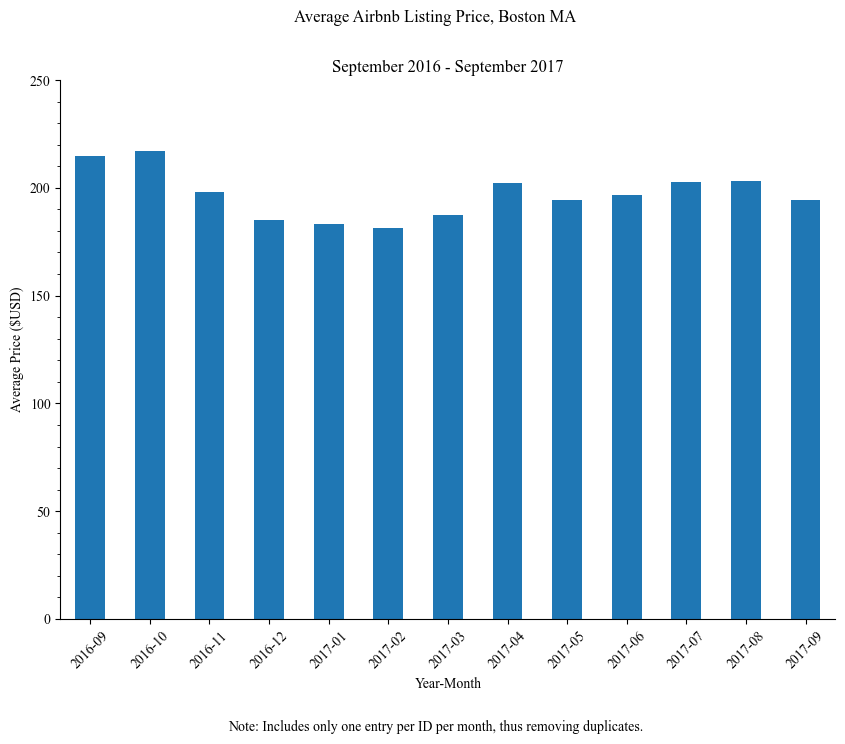

In [10]:
#2) Create a scatter plot of the average listing price per year-month

#Calculate the average listing price per month
#Reformat "price" column to float
df_calendar["price"] = df_calendar["price"].astype(str).str.replace("$", "").str.replace(".00", "").str.replace(",", "").astype(float)
#Remove duplicate IDs and calculate mean price per year-month
avg_list_price = df_calendar.groupby(["year_month", "id"])["price"].mean().reset_index()
avg_list_price = avg_list_price.groupby("year_month")["price"].mean().reset_index()
avg_list_price.rename(columns={"price":"avg_list_price"}, inplace=True)
#Convert "year_month" column to string
avg_list_price["year_month"] = avg_list_price["year_month"].astype(str)

#Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 7))
avg_list_price.plot(x="year_month", y="avg_list_price", kind="bar", ax=ax, legend=False)

#Cleaning
ax.spines["right"].set_visible(False)   
ax.spines["top"].set_visible(False)
fig.suptitle("Average Airbnb Listing Price, Boston MA")
ax.set_title("September 2016 - September 2017")
ax.set_xlabel("Year-Month")
plt.xticks(rotation=45)
ax.set_ylabel("Average Price ($USD)")
ax.set_ylim(0, 250)
#Set y ticks to incriments of 10, where every 5th tick is major and labelled
ax.set_yticks(np.arange(0, 251, 50))  
ax.yaxis.set_minor_locator(mtick.MultipleLocator(10))  
plt.figtext(0.5, -0.05, "Note: Includes only one entry per ID per month, thus removing duplicates.", 
            ha="center", fontsize=10)

save_path = r"C:\Users\eliea\Desktop\UofTYear3\Term_2\Eco225\ECO225Project\Results\bar_graph.png"
plt.savefig(save_path, dpi=600, bbox_inches='tight')
plt.show()

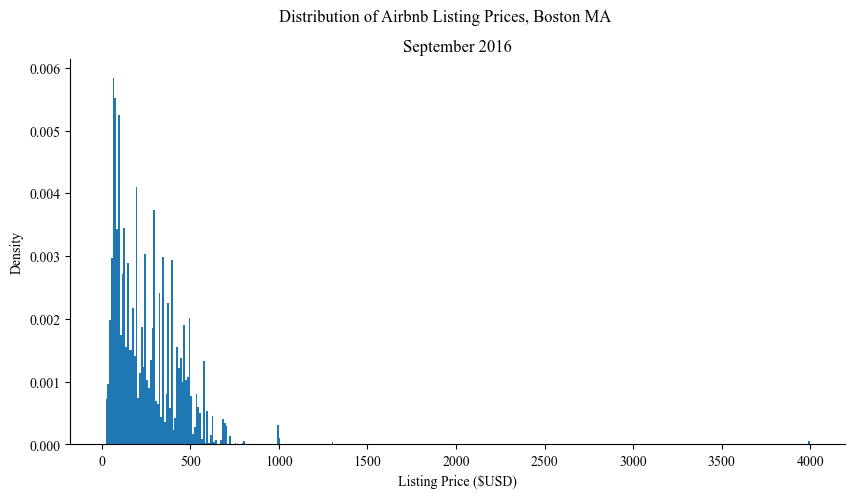

In [11]:
#3) Create a histogram of the distribution of listing prices for September 2016

#Create dataset for only September 2016
df_calendar_temp = df_calendar[df_calendar["year_month"] == "2016-09"]

#Create histogram
fig, ax = plt.subplots(figsize=(10, 5))
bins = np.linspace(df_calendar_temp["price"].min(), df_calendar_temp["price"].max(), 400)
df_calendar_temp.plot(kind="hist", y="price", ax=ax, bins=bins, legend=False, density=True) 

#Cleaning
ax.spines["right"].set_visible(False)   
ax.spines["top"].set_visible(False)
ax.set_ylabel("Density")
ax.set_xlabel("Listing Price ($USD)")
fig.suptitle("Distribution of Airbnb Listing Prices, Boston MA")
ax.set_title("September 2016")

save_path = r"C:\Users\eliea\Desktop\UofTYear3\Term_2\Eco225\ECO225Project\Results\density_hist.png"
plt.savefig(save_path, dpi=600, bbox_inches='tight')
plt.show()

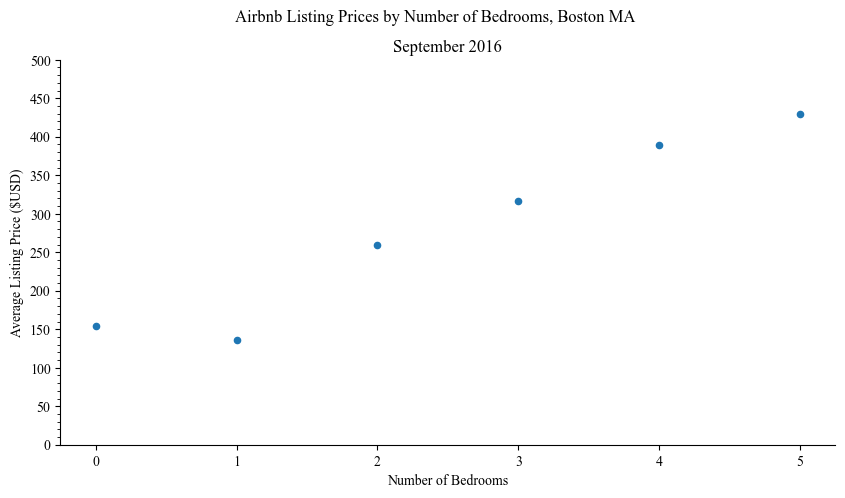

In [12]:
#4) Create a scatterplot of average listing price by number of bedrooms

df_list_cal = pd.merge(df_calendar, df_listings, on="id", how="outer")

df_list_cal

#Create temp dataset containing only observations from September 2016
df_list_cal_temp = df_list_cal[df_list_cal["year_month"] == "2016-09"]
#Clean "price" column in "df_listings" and turn values into a float
df_list_cal_temp.loc[:, "price_y"] = df_list_cal_temp["price_y"].astype(str).str.replace("$", "").str.replace(".00", "").str.replace(",", "").astype(float)

#Calculate average listing prie by number of beds
avg_bed_price = df_list_cal_temp.groupby("bedrooms")["price_y"].mean().reset_index()

#Create scatter plot
fig, ax = plt.subplots(figsize=(10, 5))
avg_bed_price.plot(kind="scatter", y="price_y", x="bedrooms", ax=ax, legend=False)

#Clean
ax.spines["right"].set_visible(False)   
ax.spines["top"].set_visible(False)
ax.set_ylabel("Average Listing Price ($USD)")
ax.set_xlabel("Number of Bedrooms")
fig.suptitle("Airbnb Listing Prices by Number of Bedrooms, Boston MA")
ax.set_title("September 2016")
ax.set_ylim(0, 500)
ax.set_yticks(np.arange(0, 501, 50))  
ax.yaxis.set_minor_locator(mtick.MultipleLocator(10))  

save_path = r"C:\Users\eliea\Desktop\UofTYear3\Term_2\Eco225\ECO225Project\Results\bed_scatter.png"
plt.savefig(save_path, dpi=600, bbox_inches='tight')
plt.show()

In [13]:
df_list_cal

,id,date,available,price_x,year_month,listing_url,scrape_id,last_scraped,name,summary,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3353,2017-09-05,t,36.0,2017-09,https://www.airbnb.com/rooms/3353,20160906204935,2016-09-07,Private & Small for Solo Travelers,"Clean and comfortable room, good for short ter...",...,9.0,f,NaN,NaN,f,strict,f,f,2,0.38
1,3353,2017-09-04,t,36.0,2017-09,https://www.airbnb.com/rooms/3353,20160906204935,2016-09-07,Private & Small for Solo Travelers,"Clean and comfortable room, good for short ter...",...,9.0,f,NaN,NaN,f,strict,f,f,2,0.38
2,3353,2017-09-03,t,36.0,2017-09,https://www.airbnb.com/rooms/3353,20160906204935,2016-09-07,Private & Small for Solo Travelers,"Clean and comfortable room, good for short ter...",...,9.0,f,NaN,NaN,f,strict,f,f,2,0.38
3,3353,2017-09-02,t,36.0,2017-09,https://www.airbnb.com/rooms/3353,20160906204935,2016-09-07,Private & Small for Solo Travelers,"Clean and comfortable room, good for short ter...",...,9.0,f,NaN,NaN,f,strict,f,f,2,0.38
4,3353,2017-09-01,t,36.0,2017-09,https://www.airbnb.com/rooms/3353,20160906204935,2016-09-07,Private & Small for Solo Travelers,"Clean and comfortable room, good for short ter...",...,9.0,f,NaN,NaN,f,strict,f,f,2,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308885,14933461,2016-09-10,f,NaN,2016-09,https://www.airbnb.com/rooms/14933461,20160906204935,2016-09-07,Boston Vacation Rentals-2,Cozy apartment on the street level of a comfor...,...,NaN,f,NaN,NaN,f,strict,f,f,20,NaN
1308886,14933461,2016-09-09,f,NaN,2016-09,https://www.airbnb.com/rooms/14933461,20160906204935,2016-09-07,Boston Vacation Rentals-2,Cozy apartment on the street level of a comfor...,...,NaN,f,NaN,NaN,f,strict,f,f,20,NaN
1308887,14933461,2016-09-08,f,NaN,2016-09,https://www.airbnb.com/rooms/14933461,20160906204935,2016-09-07,Boston Vacation Rentals-2,Cozy apartment on the street level of a comfor...,...,NaN,f,NaN,NaN,f,strict,f,f,20,NaN
1308888,14933461,2016-09-07,f,NaN,2016-09,https://www.airbnb.com/rooms/14933461,20160906204935,2016-09-07,Boston Vacation Rentals-2,Cozy apartment on the street level of a comfor...,...,NaN,f,NaN,NaN,f,strict,f,f,20,NaN
